In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
gender = pd.read_csv('gender_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
new_test = pd.merge(test,gender,on='PassengerId')
new_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [7]:
train.shape

(891, 12)

In [8]:
new_test.shape

(418, 12)

In [9]:
#Combining the train and test data
df = pd.concat([train,new_test], ignore_index=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# Exploratory Data Analysis (EDA)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [13]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

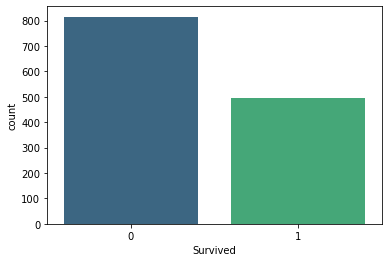

In [14]:
sns.countplot(x='Survived',data=df,palette='viridis')

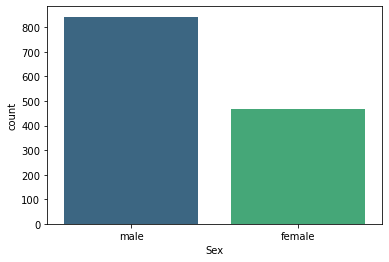

In [15]:
sns.countplot(x='Sex',data=df,palette='viridis')

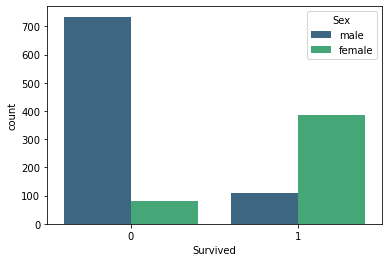

In [16]:
sns.countplot(x='Survived',data=df,hue='Sex',palette='viridis')

From the graph above, we can see that the majority survivors were womens and vice-versa

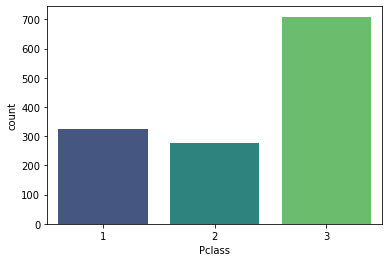

In [17]:
sns.countplot(x='Pclass',data=df,palette='viridis')

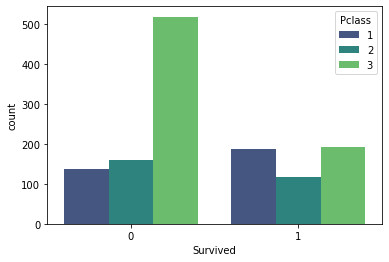

In [18]:
sns.countplot(x='Survived',data=df,hue='Pclass',palette='viridis')

From the graph above, it's shown that most passengers who did not survived were class 3 passenger which means their top priority passengers to be saved were women then following with their passenger class (women in class 1 had higher priority than women in class2; women in class 3 had higher priority than men in class 1; men in class 2 had higher priority than men in class3)

Let's take the data where the age is null value

In [19]:
df_age_null = df[df['Age'].isnull()==True]
df_age_null.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


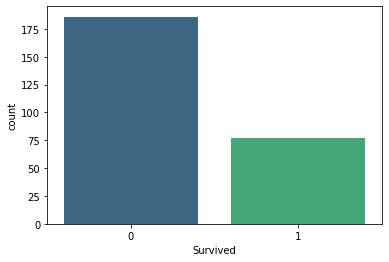

In [20]:
sns.countplot(x='Survived',data=df_age_null,palette='viridis')

Majority people with unknown age were not survived so they were basically adults or in their adolescent

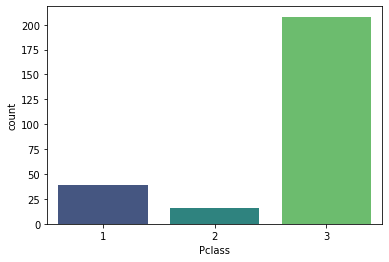

In [21]:
sns.countplot(x='Pclass',data=df_age_null,palette='viridis')

Most unknown age passengers were class 3 passenger which is logical that their safety priority was pretty low

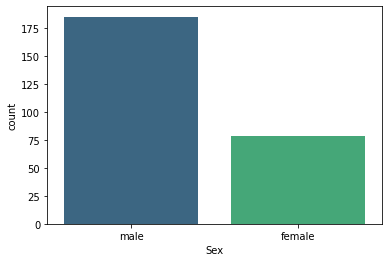

In [22]:
sns.countplot(x='Sex',data=df_age_null,palette='viridis')

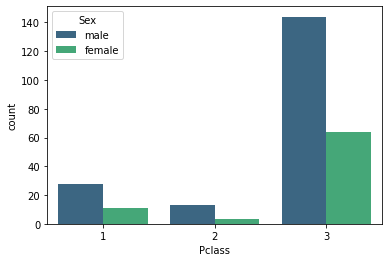

In [23]:
sns.countplot(x='Pclass',data=df_age_null,hue='Sex',palette='viridis')

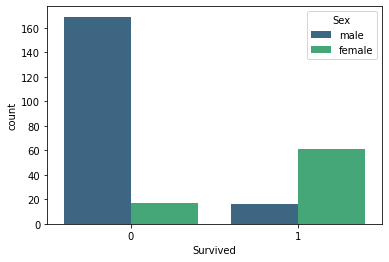

In [24]:
sns.countplot(x='Survived',data=df_age_null,hue='Sex',palette='viridis')

Majority passenger with unknown age were men and class 3 passenger which was make sense that during the titanic event, people were prioritizing women and higher class passenger

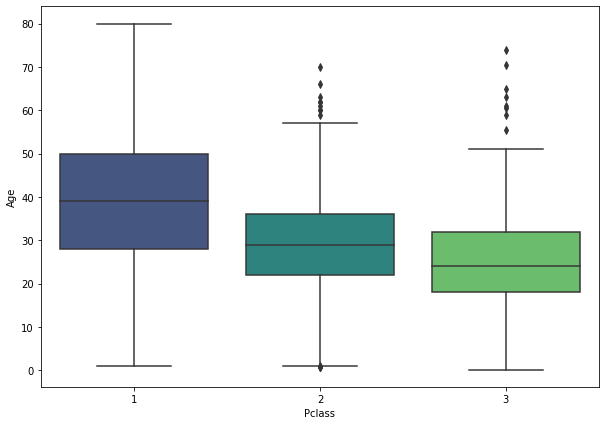

In [25]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='viridis')

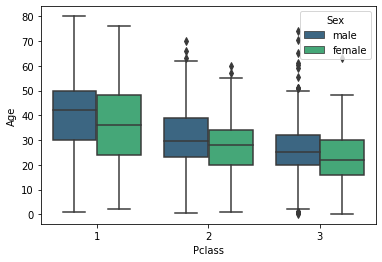

In [26]:
sns.boxplot(x='Pclass',y='Age',data=df,hue='Sex',palette='viridis')

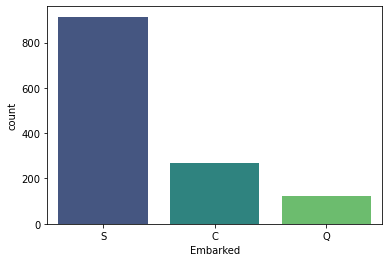

In [27]:
sns.countplot(x='Embarked',data=df,palette='viridis')

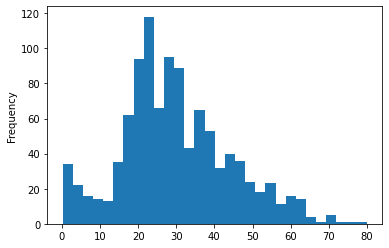

In [28]:
df['Age'].plot.hist(bins=30)

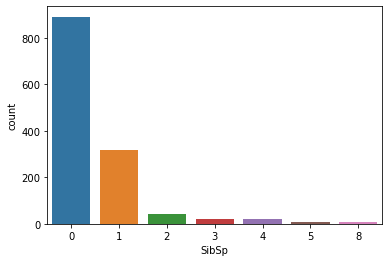

In [29]:
sns.countplot(x='SibSp',data=df)

From the graphs about, most passengers were mostly in their 20-30s which was natural if they're mostly going alone or with their spouse or siblings. Only a handful of passengers had kid(s)

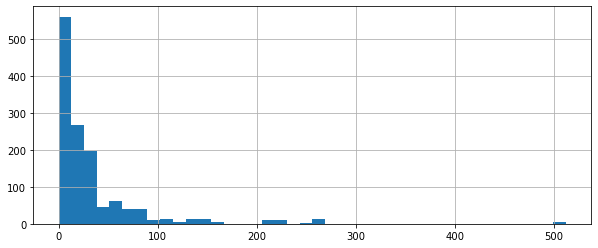

In [30]:
df['Fare'].hist(bins=40,figsize=(10,4))

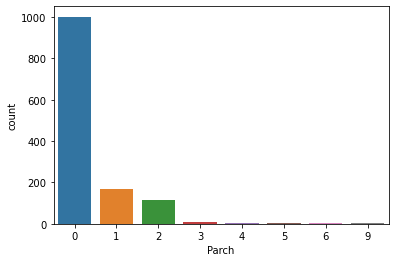

In [31]:
sns.countplot(x='Parch',data=df)

# Dealing with Missing Data

In [32]:
getting_avg = df[(df['Pclass']==1) & (df['Age'].isnull()==False)]['Age']
getting_avg.head()

1     38.0
3     35.0
6     54.0
11    58.0
23    28.0
Name: Age, dtype: float64

In [33]:
getting_avg.mean()

39.15992957746479

That's the age average of class 1 passengers that will be used for filling the null values later on

In [34]:
getting_avg2 = df[(df['Pclass']==2) & (df['Age'].isnull()==False)]['Age']
getting_avg2.head()

9     14.0
15    55.0
20    35.0
21    34.0
33    66.0
Name: Age, dtype: float64

In [35]:
getting_avg2.mean()

29.506704980842912

That's the age average of class 2 passengers that will be used for filling the null values later on

In [36]:
getting_avg3 = df[(df['Pclass']==3) & (df['Age'].isnull()==False)]['Age']
getting_avg3.head()

0    22.0
2    26.0
4    35.0
7     2.0
8    27.0
Name: Age, dtype: float64

In [37]:
getting_avg3.mean()

24.81636726546906

That's the age average of class 3 passengers that will be used for filling the null values later on

In [38]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 39.16
        elif Pclass == 2:
            return 25.51
        else:
            return 24.82
    
    else:
        return Age

In [39]:
df['Age'] = df[['Age','Pclass']].apply(fill_age,axis=1)

In [40]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

The age problem is done. For cabin, there is just too much missing values so I will just remove the column. Fare and Embarked also have minor missing value which I will just drop the data with missing value on them.

In [41]:
df.drop('Cabin',inplace=True,axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [42]:
df.dropna(inplace=True)

In [43]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

The missing values are gone for good now.

# Processing Categorical Data

In [44]:
df_sex = pd.get_dummies(df['Sex'],drop_first=True)
df_embarked = pd.get_dummies(df['Embarked'],drop_first=True)
df_Pclass = pd.get_dummies(df['Pclass'],drop_first=True)

In [45]:
df = pd.concat([df,df_sex,df_embarked,df_Pclass],axis=1)

In [46]:
df.drop(['Sex','Embarked','Name','Ticket','Pclass'],axis=1,inplace=True)

In [47]:
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


Split the train and test data again based on PassengerId

In [48]:
actual_train = df[df['PassengerId']<892]
actual_train.tail()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
886,887,0,27.00,0,0,13.00,1,0,1,1,0
887,888,1,19.00,0,0,30.00,0,0,1,0,0
888,889,0,24.82,1,2,23.45,0,0,1,0,1
889,890,1,26.00,0,0,30.00,1,0,0,0,0
890,891,0,32.00,0,0,7.75,1,1,0,0,1


In [49]:
actual_test = df[df['PassengerId']>=892]
actual_test.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
891,892,0,34.5,0,0,7.8292,1,1,0,0,1
892,893,1,47.0,1,0,7.0000,0,0,1,0,1
893,894,0,62.0,0,0,9.6875,1,1,0,1,0
894,895,0,27.0,0,0,8.6625,1,0,1,0,1
895,896,1,22.0,1,1,12.2875,0,0,1,0,1


In [50]:
actual_train.drop('PassengerId',axis=1,inplace=True)

C:\Users\Hendra\anaconda3\envs\fluffy\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [51]:
actual_test.drop('PassengerId',axis=1,inplace=True)

In [52]:
X_train = actual_train.drop('Survived',axis=1)

In [53]:
y_train = actual_train['Survived']

In [54]:
X_test = actual_test.drop('Survived',axis=1)

In [55]:
y_test = actual_test['Survived']

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()

In [58]:
X_train = scaler.fit_transform(X_train)

In [59]:
X_test = scaler.transform(X_test)

# Logistic Regression Model

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logmodel = LogisticRegression()

In [62]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [63]:
log_predict = logmodel.predict(X_test)

# K-Nearest Neighbors Model

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
error_rate = []

In [66]:
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_predict_i = knn.predict(X_test)
    error_rate.append(np.mean(knn_predict_i!=y_test))

Text(0, 0.5, 'Error Rate')

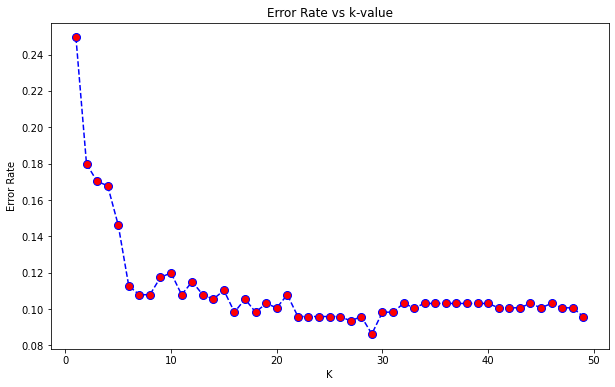

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',
        markersize=8)
plt.title('Error Rate vs k-value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the graph above, it is shown that using K=29 gave the lowest error rate, so it will be our k-value for this model

In [68]:
knn_new = KNeighborsClassifier(n_neighbors=29)

In [69]:
knn_new.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=29)

In [70]:
knn_predict = knn_new.predict(X_test)

# Decision Tree Model

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dtree = DecisionTreeClassifier()

In [73]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
dtree_predict = dtree.predict(X_test)

# Random Forest Model

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rfc = RandomForestClassifier(n_estimators=200)

In [77]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [78]:
rfc_predict = rfc.predict(X_test)

# Deep Learning Model

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [80]:
model = Sequential()

model.add(Dense(9,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [81]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [82]:
model.fit(x=X_train,y=y_train,epochs=500,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/500
28/28 [==============================] - 1s 19ms/step - loss: 0.6983 - val_loss: 0.6976
Epoch 2/500
28/28 [==============================] - 0s 7ms/step - loss: 0.6880 - val_loss: 0.6937
Epoch 3/500
28/28 [==============================] - 0s 5ms/step - loss: 0.6837 - val_loss: 0.6863
Epoch 4/500
28/28 [==============================] - 0s 5ms/step - loss: 0.6781 - val_loss: 0.6781
Epoch 5/500
28/28 [==============================] - 0s 5ms/step - loss: 0.6734 - val_loss: 0.6698
Epoch 6/500
28/28 [==============================] - 0s 5ms/step - loss: 0.6719 - val_loss: 0.6626
Epoch 7/500
28/28 [==============================] - 0s 5ms/step - loss: 0.6623 - val_loss: 0.6539
Epoch 8/500
28/28 [==============================] - 0s 5ms/step - loss: 0.6622 - val_loss: 0.6488
Epoch 9/500
28/28 [==============================] - 0s 5ms/step - loss: 0.6589 - val_loss: 0.6463
Epoch 10/500
28/28 [==============================] - 0s 5ms/step - loss: 0.6650 - val_loss: 0.6433
Epoch 11

28/28 [==============================] - 0s 6ms/step - loss: 0.5414 - val_loss: 0.4088
Epoch 84/500
28/28 [==============================] - 0s 5ms/step - loss: 0.5838 - val_loss: 0.4030
Epoch 85/500
28/28 [==============================] - 0s 6ms/step - loss: 0.5577 - val_loss: 0.3981
Epoch 86/500
28/28 [==============================] - 0s 6ms/step - loss: 0.5635 - val_loss: 0.4003
Epoch 87/500
28/28 [==============================] - 0s 4ms/step - loss: 0.5666 - val_loss: 0.3991
Epoch 88/500
28/28 [==============================] - 0s 4ms/step - loss: 0.5612 - val_loss: 0.4028
Epoch 89/500
28/28 [==============================] - 0s 5ms/step - loss: 0.5454 - val_loss: 0.4000
Epoch 90/500
28/28 [==============================] - 0s 6ms/step - loss: 0.5525 - val_loss: 0.3989
Epoch 91/500
28/28 [==============================] - 0s 6ms/step - loss: 0.5798 - val_loss: 0.4021
Epoch 92/500
28/28 [==============================] - 0s 5ms/step - loss: 0.5546 - val_loss: 0.4013
Epoch 93/500


In [83]:
losses = pd.DataFrame(model.history.history)

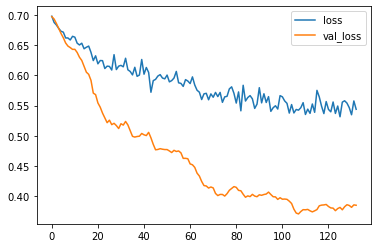

In [84]:
losses.plot()

In [85]:
deep_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


# Evaluating every Models

In [86]:
from sklearn.metrics import classification_report,confusion_matrix

In [87]:
print(classification_report(y_test,log_predict))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       265
           1       0.93      0.94      0.93       152

    accuracy                           0.95       417
   macro avg       0.95      0.95      0.95       417
weighted avg       0.95      0.95      0.95       417



In [88]:
print(confusion_matrix(y_test,log_predict))

[[254  11]
 [  9 143]]


In [89]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       265
           1       1.00      0.76      0.87       152

    accuracy                           0.91       417
   macro avg       0.94      0.88      0.90       417
weighted avg       0.92      0.91      0.91       417



In [90]:
print(confusion_matrix(y_test,knn_predict))

[[265   0]
 [ 36 116]]


In [91]:
print(classification_report(y_test,dtree_predict))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       265
           1       0.69      0.74      0.71       152

    accuracy                           0.78       417
   macro avg       0.76      0.77      0.77       417
weighted avg       0.79      0.78      0.78       417



In [92]:
print(confusion_matrix(y_test,dtree_predict))

[[214  51]
 [ 40 112]]


In [93]:
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       265
           1       0.73      0.76      0.74       152

    accuracy                           0.81       417
   macro avg       0.79      0.80      0.79       417
weighted avg       0.81      0.81      0.81       417



In [94]:
print(confusion_matrix(y_test,rfc_predict))

[[222  43]
 [ 37 115]]


In [95]:
print(classification_report(y_test,deep_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       265
           1       1.00      0.72      0.84       152

    accuracy                           0.90       417
   macro avg       0.93      0.86      0.88       417
weighted avg       0.91      0.90      0.89       417



In [96]:
print(confusion_matrix(y_test,deep_pred))

[[265   0]
 [ 43 109]]


Logistic Regression Model gave the best prediction based on its F-1 score and followed by deep learning model. However K-Nearest Neighbor Model seems unsuitable for this task because of its low F-1 score